In [4]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

from matplotlib import pyplot
import matplotlib as mpl

import gzip


%matplotlib inline



In [16]:
# This is a Fashin_MNIST Datasets 

data_file_name = {
    'train_image':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_image':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

label_description = [ 'T-shirt/top','Trouser', 'Pullover',
    'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

dir_data_file = './data'
image_size = 784

In [6]:
def LoadLabel(file_name):
    # file_name의 Binary 파일을 읽어서 numpy.ndarray 를 Return 한다.
    file_path = dir_data_file + "/" + file_name
    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    rtval = data
    print(file_name + " file loaded")
    return rtval

def LoadImage(file_name):
    # file_name의 Binary 파일을 읽어서 numpy.ndarray 를 Return 한다.
    file_path = dir_data_file + "/" + file_name   
    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    rtval = data.reshape(-1, image_size)
    print(file_name + " file loaded")
    return rtval

def DictoNumpy():
    ## Dictionary data-type으로 
    dic_data = {}
    print(type(dic_data))
    dic_data['train_image'] =  LoadImage(data_file_name['train_image'])
    dic_data['train_label'] = LoadLabel(data_file_name['train_label'])    
    dic_data['test_image'] = LoadImage(data_file_name['test_image'])
    dic_data['test_label'] = LoadLabel(data_file_name['test_label'])
    
    return dic_data

def NormalizeData(dic_data):
    dic_data['train_image'] = dic_data['train_image']/255
    dic_data['test_image'] = dic_data['test_image']/255
    return dic_data

In [7]:
dic_data = DictoNumpy()
dic_data = NormalizeData(dic_data)

<class 'dict'>
train-images-idx3-ubyte.gz file loaded
train-labels-idx1-ubyte.gz file loaded
t10k-images-idx3-ubyte.gz file loaded
t10k-labels-idx1-ubyte.gz file loaded


In [14]:
## For Time Saving Cut the Train Image size to 10000 samples ( IT takes for about 4min )

X_train = dic_data['train_image'][:10000]
y_train = dic_data['train_label'][:10000]
X_test = dic_data['test_image']
y_test = dic_data['test_label']

In [50]:
kernel_svm = svm.SVC(gamma=.2)


In [51]:
kernel_svm_start_time = dt.datetime.now()

print ('Start kernel svm learning at {}'.format(str(kernel_svm_start_time)))
kernel_svm.fit(X_train, y_train)
kernel_svm_end_time = dt.datetime.now()
elapsed_time = kernel_svm_end_time - kernel_svm_start_time
print ('End kernel svm learning at {}'.format(str(kernel_svm_end_time)))
print ('Elapsed learning {}'.format(str(elapsed_time)))
print ('Test Score : {}'.format(str(kernel_svm.score(X_train, y_train))))

Start kernel svm learning at 2017-08-28 17:30:03.038779
End kernel svm learning at 2017-08-28 17:32:51.041632
Elapsed learning 0:02:48.002853
Test Score : 0.9998


In [52]:

kernel_svm_start_time = dt.datetime.now()
kernel_svm_score = kernel_svm.score(X_test, y_test)
elapsed_time = dt.datetime.now() - kernel_svm_start_time
print ('Prediction takes {}'.format(str(elapsed_time)))

Prediction takes 0:01:23.668029


In [53]:
print (kernel_svm_score)

0.6319


In [9]:
def ImageDisplay(list_data):
    ## List형의 Pixcel 정보를 받아서 이미지로 보여준다.
    fig = pyplot.figure()
    axis = fig.add_subplot(1,1,1)
    plot_img = axis.imshow(list_data, cmap=mpl.cm.Greys)
    plot_img.set_interpolation('none')
#    ax.xaxis.set_ticks_position('top')
#    ax.yaxis.set_ticks_position('left')
    pyplot.show()


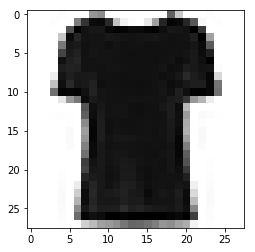

T-shirt/top


In [20]:
ImageDisplay (X_train[110].reshape(28,28))
print (label_description[y_train[110]])

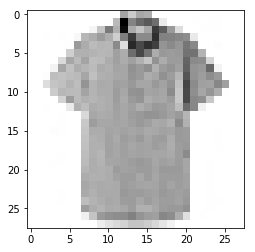

Shirt


In [24]:
ImageDisplay (X_train[610].reshape(28,28))
print (label_description[y_train[61]])